<a href="https://colab.research.google.com/github/AshishRaj04/Breast-Cancer-Classification-using-Custom-Neural-Network/blob/main/breast_cancer_classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/AshishRaj04/Breast-Cancer-Classification-using-Custom-Neural-Network.git

Cloning into 'Breast-Cancer-Classification-using-Custom-Neural-Network'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 35 (delta 12), reused 25 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 375.09 KiB | 3.64 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
import sys
import os

cwd = os.getcwd()
src_dir = os.path.join(cwd, 'Breast-Cancer-Classification-using-Custom-Neural-Network/src')
sys.path.append(src_dir)

In [3]:
from nn import MLP

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_path = "/content/Breast-Cancer-Classification-using-Custom-Neural-Network/data/breast-cancer.csv"

# Data Preprocessing

In [6]:
df = pd.read_csv(data_path)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We have to drop columns . We will only keep the mean data .

In [8]:
df = df.drop(['id'] , axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df = df.drop([col for col in df.columns[11 : ]] , axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


- None of the entries are NULL value
- Only diagnosis is object type other are float values

In [11]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [13]:
from pathlib import Path

In [39]:
# code to save the figures and plots

IMAGES_PATH = Path() / "results"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis)

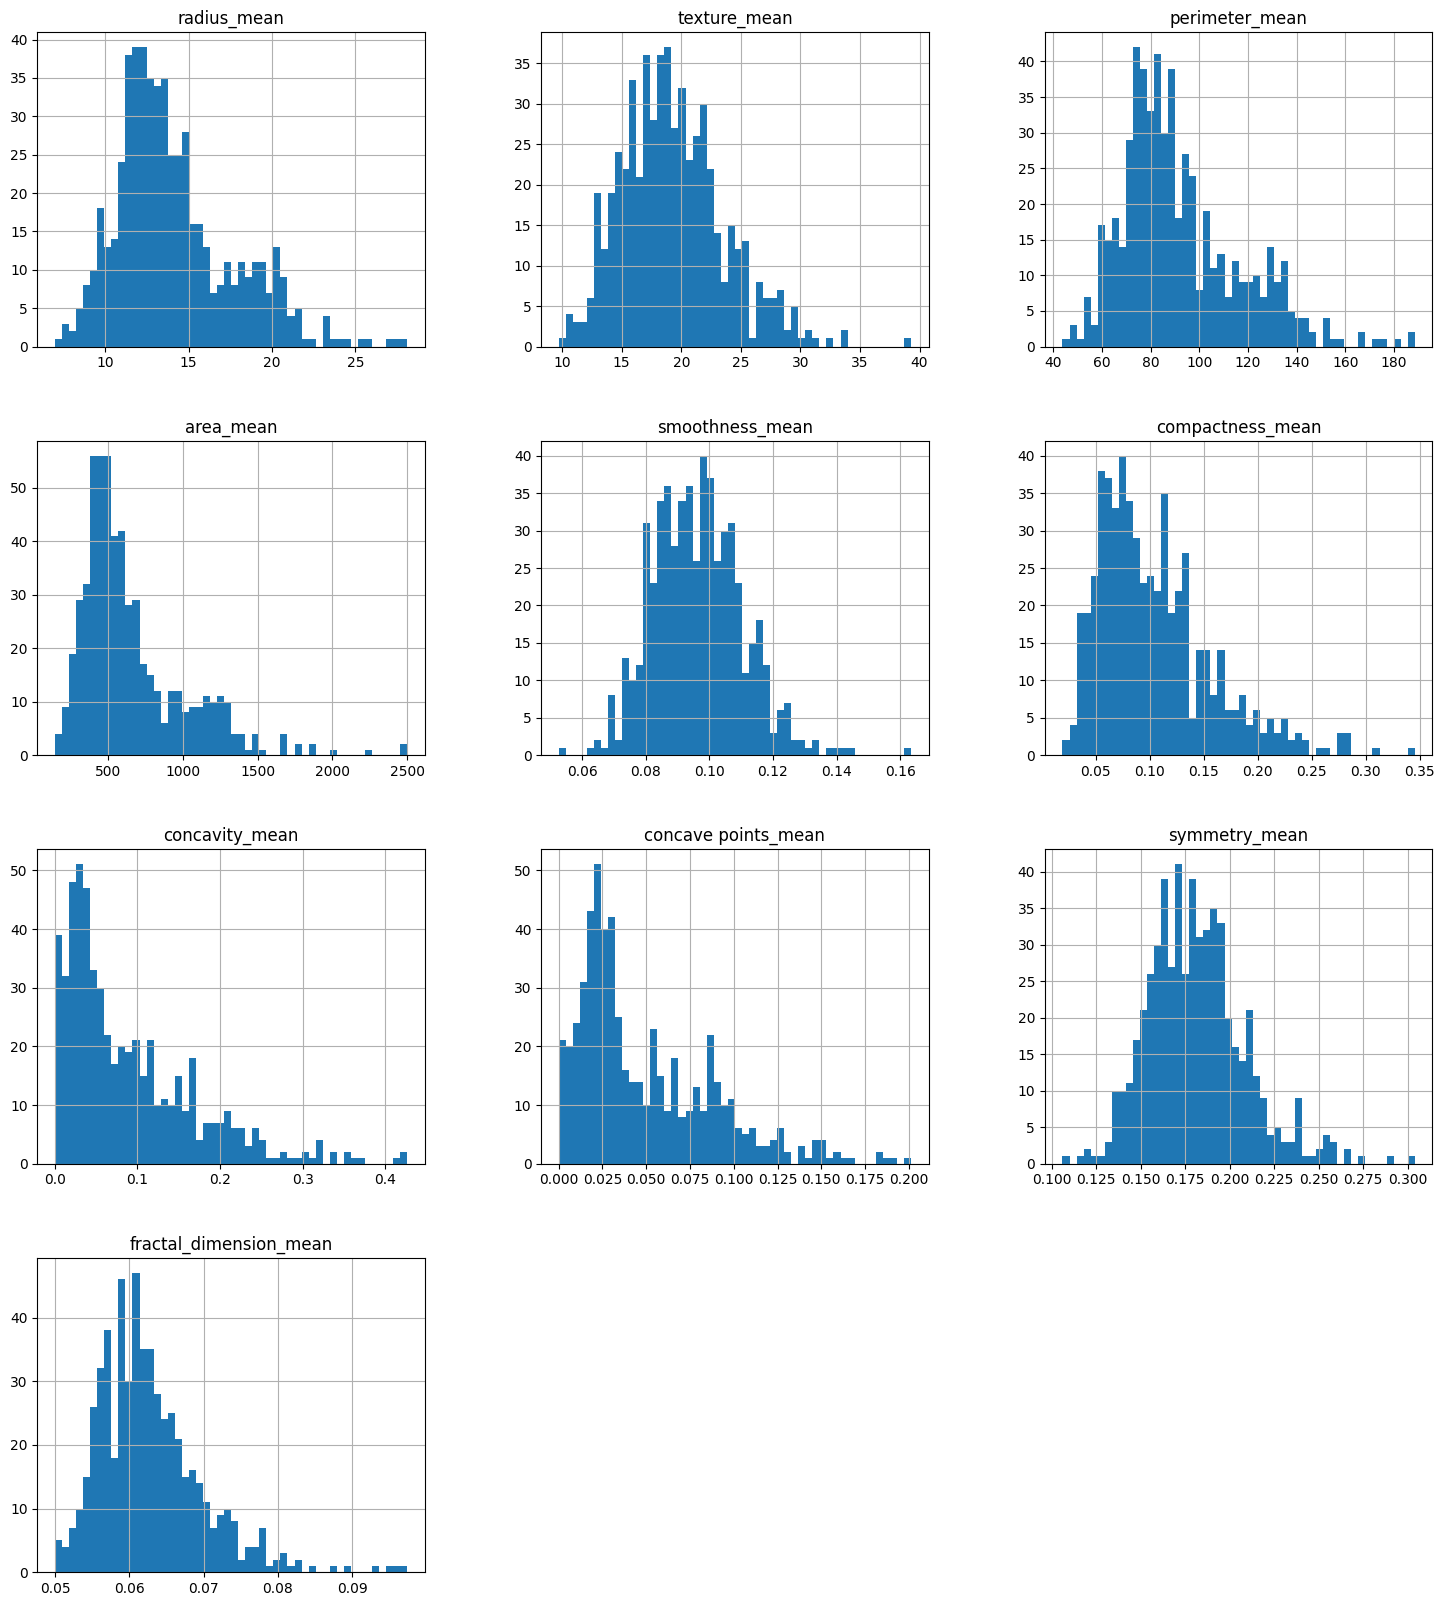

In [15]:
df.hist(bins = 50 , figsize=(18,20))
# save_fig("attribute_histogram_plots")
plt.show()

- Some are skewed to the right . Rather need bell-shaped distributions .
- Different Scales of each attributes

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set , test_set = train_test_split(df , test_size=0.1 , random_state=42)

In [18]:
df_cat = df[["diagnosis"]]
df_cat.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


- M = 1
- B = 0

In [19]:
df_cat = df_cat.copy()
df_cat["diagnosis"] = df_cat["diagnosis"].map({"M" : 1 , "B" : 0})
df_cat.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [43]:
df_num = df.drop(["diagnosis"] , axis=1)
df_num.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
df_num_scaled = min_max_scaler.fit_transform(df_num)

In [45]:
df_num_scaled = pd.DataFrame(df_num_scaled , columns=df_num.columns)
df_num_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


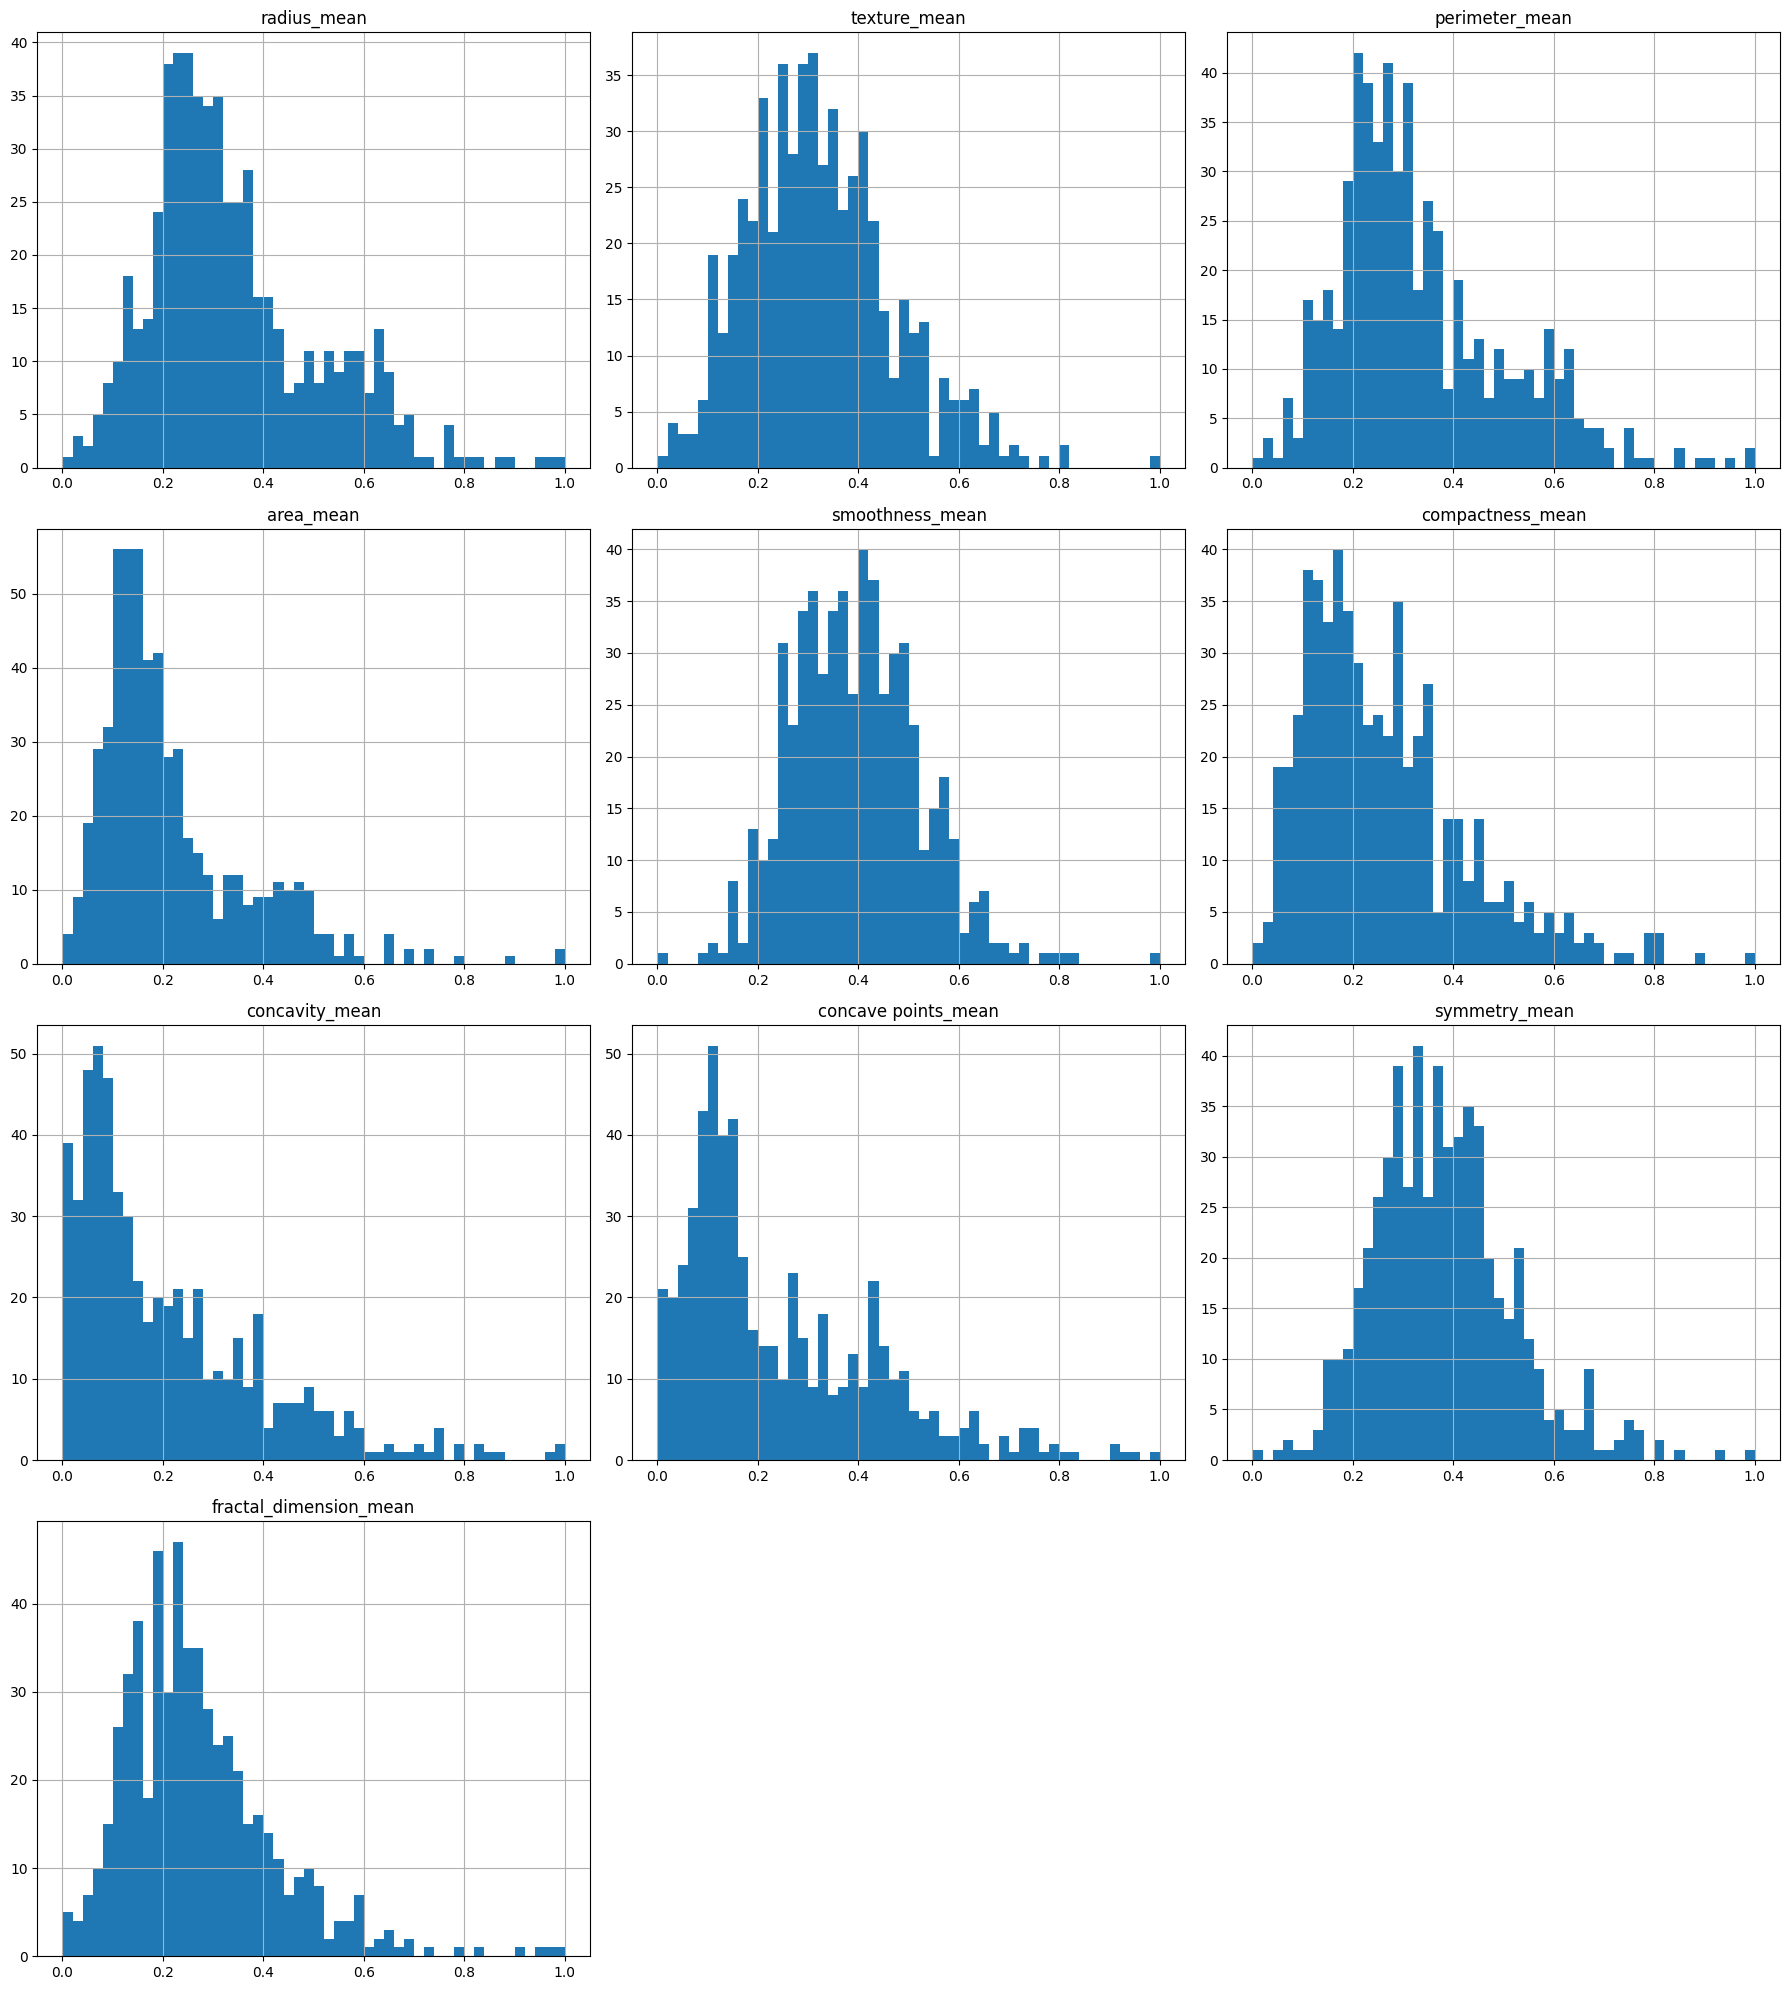

In [46]:
df_num_scaled.hist(bins = 50 , figsize=(18,20))
save_fig("scaled_attribute_histogram_plots")
plt.show()

columns to be transformed into bell shaped curve = perimeter_mean , area_mean , compactness_mean , concavity_mean , concave points_mean

In [47]:
df_combined = pd.concat([df_cat , df_num_scaled] , axis=1)

In [48]:
df_transformed = df_combined.copy()
columns_to_transform = ["perimeter_mean" , "area_mean" , "compactness_mean" , "concavity_mean" , "concave points_mean"]
df_transformed[columns_to_transform] = np.log1p(df_transformed[columns_to_transform])

- train on df_combined , do evaluation
- then train on df_transform , do evaluation
- whichever is better keep that

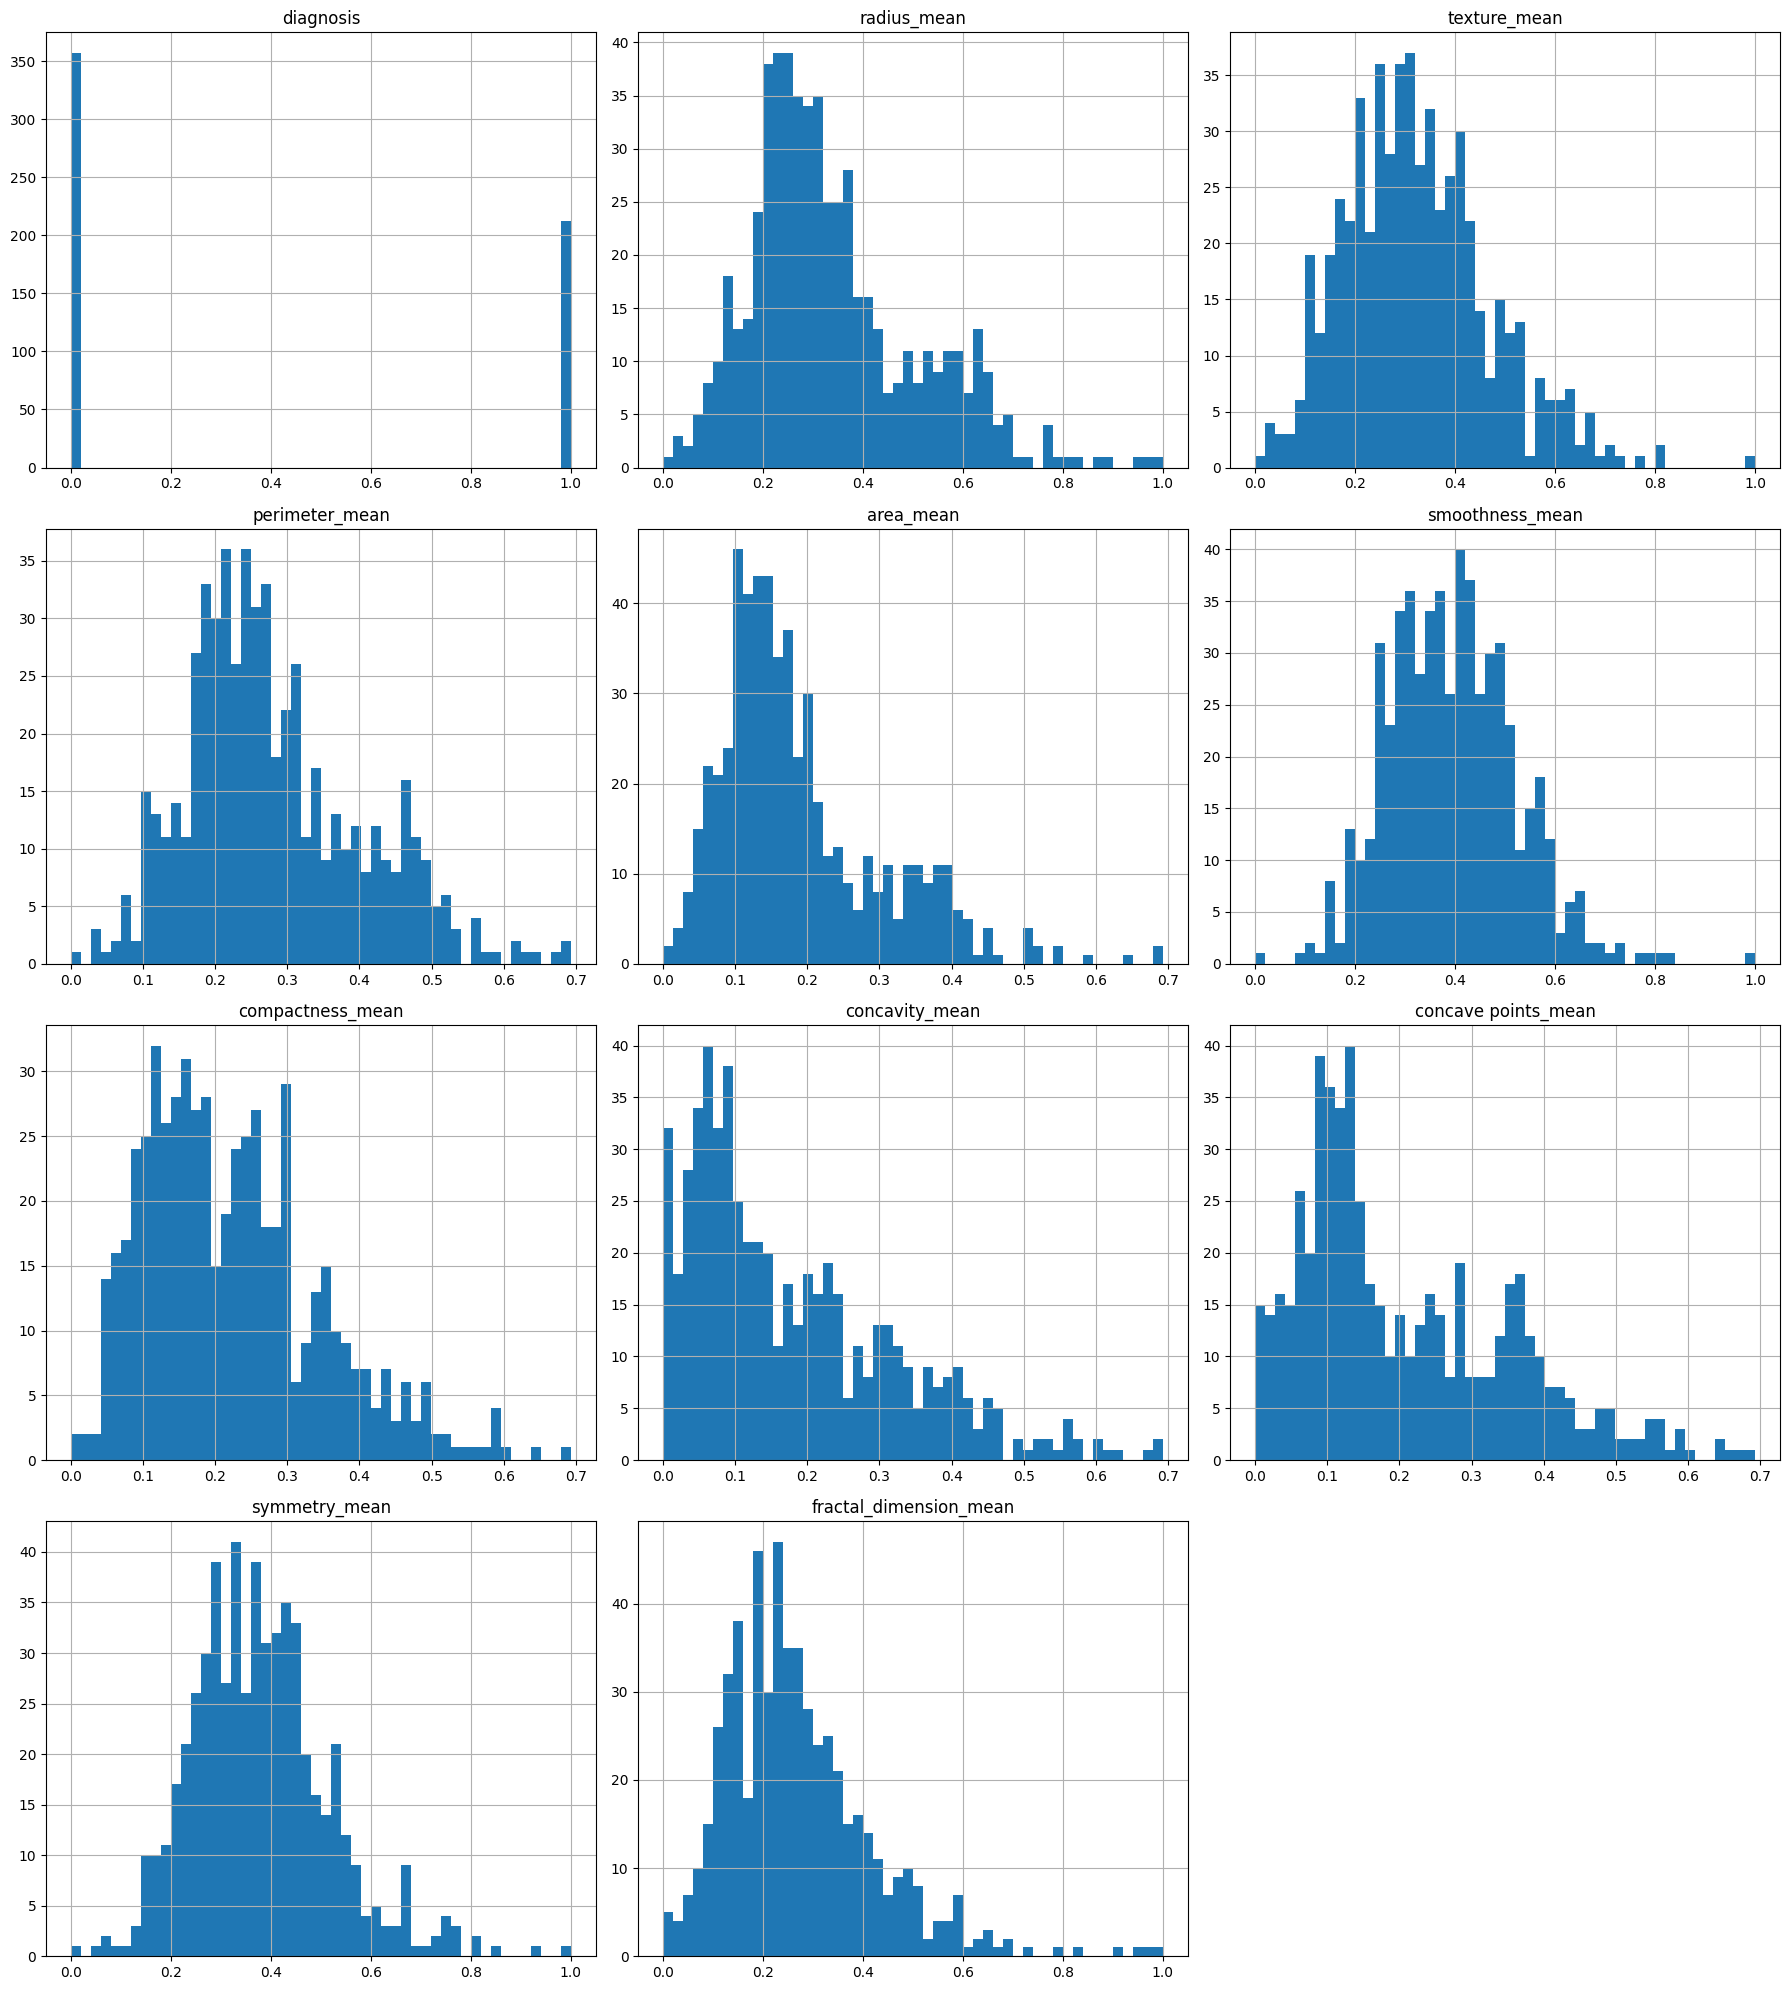

In [49]:
df_transformed.hist(bins = 50 , figsize=(18,20))
save_fig("transformed_attribute_histogram_plots")
plt.show()

# Traning Phase

In [54]:
train_set , test_set = train_test_split(df_combined , test_size=0.1 , random_state=42)

In [62]:
y_train = train_set['diagnosis']
x_train = train_set.drop(['diagnosis'] , axis=1)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train.shape

(512,)

In [66]:
x_train.shape

(512, 10)

In [70]:
x_train[100] , y_train[100]

(array([0.03686876, 0.50152181, 0.02853984, 0.01590668, 0.        ,
        0.07435127, 0.        , 0.        , 0.26616162, 0.18702612]),
 np.int64(0))

In [ ]:
mlp = MLP(10, [32, 16, 1], activations=["relu", "relu", "sigmoid"])
y_pred = mlp(x_train[100])
print(y_pred)

Value(data=0.9999996551725782)

In [ ]:
from engine import Value

In [ ]:
y_pred = np.array([mlp(x) for x in x_train])

In [ ]:
def bce_loss(y_pred, y_true):
    eps = Value(1e-7)
    losses = []
    for y_p, y_t in zip(y_pred, y_true):
        
        y_p_data = max(min(y_p.data, 1 - 1e-7), 1e-7)  
        y_p = Value(y_p_data)  

        y_t = Value(y_t) if not isinstance(y_t, Value) else y_t

        loss = -(
            y_t * (y_p + eps).log() + (Value(1) - y_t) * (Value(1) - y_p + eps).log()
        )
        losses.append(loss)

    return sum(losses, Value(0)).mean()

In [ ]:
loss = bce_loss(y_pred, y_train)
print(f"Initial loss: {loss}")

In [ ]:
for p in mlp.parameters():
    p.grad = 0.0  # Reset gradients
loss.backward()  # Compute gradients
for p in mlp.parameters():
    p.data -= 0.01 * p.grad  # Update parameters

In [ ]:
learning_rate = 0.1  # Increased from 0.01
losses = []

for epoch in range(30):
    # Forward pass - handle one sample at a time to avoid memory issues
    epoch_loss = Value(0.0)
    batch_losses = []
    
    for x, y_true in zip(x_train, y_train):
        # Get prediction for single sample
        y_pred = mlp(x)
        
        # Calculate loss for this sample
        loss = bce_loss([y_pred], [y_true])
        batch_losses.append(loss)
    
    # Calculate mean loss for the epoch
    epoch_loss = sum(batch_losses, Value(0.0)).mean()
    
    # Zero gradients
    for p in mlp.parameters():
        p.grad = 0.0
    
    # Backward pass
    epoch_loss.backward()
    
    # Update parameters with gradient clipping
    for p in mlp.parameters():
        # Clip gradients to prevent exploding gradients
        grad = max(min(p.grad, 1.0), -1.0)
        p.data -= learning_rate * grad
    
    losses.append(epoch_loss.data)  # Store the loss value
    
    if epoch % 5 == 0:  # Print every 5 epochs
        print(f"Epoch {epoch}: Loss {epoch_loss.data:.4f}")